In [2]:
import pandas as pd

In [3]:
file_dir = r'C:\Users\qusru\open'

In [4]:
import numpy as np
import random
import os
import gc

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [5]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(42) # Seed 고정

In [6]:
train = pd.read_csv(file_dir + r'\train_lb.csv')
test = pd.read_csv(file_dir + r'\test_lb.csv')
sample_submission = pd.read_csv(file_dir+r'\sample_submission.csv', index_col = 0)

In [7]:
train = train.drop(columns = ['Estimated_Departure_Time','Estimated_Arrival_Time','Estimated_Departure_Time_HH:MM', 'Estimated_Arrival_Time_HH:MM'])
train[['Estimated_Departure_Time']] = [int(str(int(i)) + str(int(j))) for i, j in zip(train['Estimated_Departure_HH'], train['Estimated_Departure_MM'])]
train[['Estimated_Arrival_Time']] = [int(str(int(i)) + str(int(j))) for i, j in zip(train['Estimated_Arrival_HH'], train['Estimated_Arrival_MM'])]
train

,ID,Month,Day_of_Month,Cancelled,Diverted,Origin_Airport,Origin_Airport_ID,Origin_State,Destination_Airport,Destination_Airport_ID,...,Carrier_Code(IATA),Carrier_ID(DOT),Tail_Number,Delay,Estimated_Departure_HH,Estimated_Departure_MM,Estimated_Arrival_HH,Estimated_Arrival_MM,Estimated_Departure_Time,Estimated_Arrival_Time
0,TRAIN_000000,4,15,0,0,OKC,13851,Oklahoma,HOU,12191,...,WN,19393.0,N7858A,Not_Delayed,14.0,55.0,16.0,20.0,1455,1620
1,TRAIN_000001,8,15,0,0,ORD,13930,Illinois,SLC,14869,...,UA,20304.0,N125SY,Not_Delayed,7.0,40.0,10.0,24.0,740,1024
2,TRAIN_000002,9,6,0,0,CLT,11057,North Carolina,LGA,12953,...,AA,19805.0,N103US,Not_Delayed,16.0,10.0,18.0,5.0,1610,185
3,TRAIN_000003,7,10,0,0,LAX,12892,California,EWR,11618,...,UA,19977.0,N595UA,Not_Delayed,9.0,5.0,17.0,35.0,95,1735
4,TRAIN_000004,1,11,0,0,SFO,14771,California,ACV,10157,...,UA,20304.0,N161SY,Not_Delayed,9.0,0.0,10.0,19.0,90,1019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,TRAIN_999995,9,18,0,0,ORD,13930,Illinois,PHL,14100,...,UA,19977.0,N477UA,Not_Delayed,9.0,36.0,12.0,43.0,936,1243
999996,TRAIN_999996,5,30,0,0,FAR,11637,North Dakota,MSP,13487,...,DL,20304.0,N439SW,Not_Delayed,9.0,20.0,10.0,28.0,920,1028
999997,TRAIN_999997,6,28,0,0,OAK,13796,California,HOU,12191,...,WN,19393.0,N230WN,Not_Delayed,8.0,0.0,13.0,40.0,80,1340
999998,TRAIN_999998,9,27,0,0,BNA,10693,Tennessee,ATL,10397,...,DL,19790.0,N968DL,Not_Delayed,16.0,13.0,18.0,24.0,1613,1824


In [8]:
test = test.drop(columns = ['Estimated_Departure_Time','Estimated_Arrival_Time','Estimated_Departure_Time_HH:MM', 'Estimated_Arrival_Time_HH:MM'])
test[['Estimated_Departure_Time']] = [int(str(int(i)) + str(int(j))) for i, j in zip(test['Estimated_Departure_HH'], test['Estimated_Departure_MM'])]
test[['Estimated_Arrival_Time']] = [int(str(int(i)) + str(int(j))) for i, j in zip(test['Estimated_Arrival_HH'], test['Estimated_Arrival_MM'])]
test

,ID,Month,Day_of_Month,Cancelled,Diverted,Origin_Airport,Origin_Airport_ID,Origin_State,Destination_Airport,Destination_Airport_ID,...,Airline,Carrier_Code(IATA),Carrier_ID(DOT),Tail_Number,Estimated_Departure_HH,Estimated_Departure_MM,Estimated_Arrival_HH,Estimated_Arrival_MM,Estimated_Departure_Time,Estimated_Arrival_Time
0,TEST_000000,12,16,0,0,IAH,12266,Texas,SAT,14683,...,United Air Lines Inc.,UA,19977.0,N79402,11.0,56.0,12.0,54.0,1156,1254
1,TEST_000001,9,12,0,0,EWR,11618,New Jersey,ATL,10397,...,Delta Air Lines Inc.,DL,19790.0,N3765,15.0,0.0,17.0,15.0,150,1715
2,TEST_000002,3,6,0,0,ORD,13930,Illinois,LGA,12953,...,United Air Lines Inc.,UA,19977.0,N413UA,16.0,0.0,19.0,15.0,160,1915
3,TEST_000003,5,18,0,0,OAK,13796,California,LAX,12892,...,Southwest Airlines Co.,WN,19393.0,N905WN,19.0,20.0,20.0,45.0,1920,2045
4,TEST_000004,7,7,0,0,FLL,11697,Florida,LAX,12892,...,JetBlue Airways,B6,20409.0,N945JT,19.0,15.0,21.0,52.0,1915,2152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,TEST_999995,6,2,0,0,LAX,12892,California,DEN,11292,...,Southwest Airlines Co.,WN,19393.0,N720WN,6.0,0.0,22.0,40.0,60,2240
999996,TEST_999996,6,8,0,0,BUF,10792,New York,ORD,13930,...,United Air Lines Inc.,UA,19977.0,N401UA,6.0,0.0,6.0,48.0,60,648
999997,TEST_999997,6,11,0,0,IAD,12264,Virginia,DTW,11433,...,Mesa Airlines Inc.,UA,20378.0,N510MJ,17.0,10.0,19.0,7.0,1710,197
999998,TEST_999998,11,17,0,0,SAN,14679,California,BOS,10721,...,JetBlue Airways,B6,20409.0,N986JB,21.0,10.0,5.0,0.0,2110,50


In [9]:
import itertools
import pandas as pd
import datetime 
def feature_engineering(t):
	def to_time(time_list):
		Time = pd.Series(time_list).astype(str).str.zfill(4)
		Time = Time.replace('2400','0000')
		return Time
	time_list = [i if str(i) == 'nan' else str(int(i))  for i in t['Estimated_Departure_Time'] ]
	time_list1 = [i if str(i) == 'nan' else str(int(i))  for i in t['Estimated_Arrival_Time'] ]
	
	def parse_times(val):
		val = val.strip()
		h, m = int(val[:2]), int(val[2:])
		if hrs:= m // 60>0:
			h += hrs
			m = m - hrs*60
		h = h%24
		return datetime.time(hour=h, minute=m).strftime('%H:%M')

	t['Estimated_Departure_Time_HH:MM'] = [parse_times(i) for i in to_time(time_list)] 
	t['Estimated_Arrival_Time_HH:MM'] = [parse_times(i) for i in to_time(time_list1)] 
	
	# 예상 비행시간 만들기 (분으로 만들기)
	est_time = []
	for i,j in zip(t['Estimated_Arrival_Time_HH:MM'], t['Estimated_Departure_Time_HH:MM']):
		if i != 'nan' and j != 'nan':
			if (datetime.datetime.strptime(i, "%H:%M") - datetime.datetime.strptime(j, "%H:%M")).total_seconds()/60 >= 0:
				est_time.append((datetime.datetime.strptime(i, "%H:%M") - datetime.datetime.strptime(j, "%H:%M")).total_seconds()/60)
			else:
				time = datetime.datetime.strptime(i, "%H:%M") - datetime.datetime.strptime(j, "%H:%M") + datetime.datetime.strptime('23:59', "%H:%M") + datetime.timedelta(minutes=1)
				est_time.append(datetime.timedelta(hours=time.hour,minutes=time.minute ).total_seconds()/60)
		else:
			est_time.append(np.NaN)
			
	# 예상 출발, 도착시간 그룹 화
	def time_gb(x):		
		if x >= 600 and x <= 659:
			return '0600-0659'
		elif x>=1400 and x<=1459:
			return '1400-1459'
		elif x>=1200 and x<=1259:
			return '1200-1259'
		elif x>=1500 and x<=1559:
			return '1500-1559'
		elif x>=1900 and x<=1959:
			return '1900-1959'
		elif x>=900 and x<=959:
			return '0900-0959'
		elif x>=1000 and x<=1059:
			return  '1000-1059'
		elif x>=2000 and x<=2059:
			return '2000-2059'
		elif x>=1300 and x<=1359:
			return '1300-1359'
		elif x>=1100 and x<=1159:
			return '1100-1159'
		elif x>=800 and x<=859:
			return '0800-0859'
		elif x>=2200 and x<=2259:
			return '2200-2259'
		elif x>=1600 and x<=1659:
			return '1600-1659'
		elif x>=1700 and x<=1759:
			return '1700-1759'
		elif x>=2100 and x<=2159:
			return '2100-2159'
		elif x>=700 and x<=759:
			return '0700-0759'
		elif x>=1800 and x<=1859:
			return '1800-1859'
		elif x>=1 and x<=559:
			return '0001-0559'
		elif x>=2300 and x<=2400:
			return '2300-2400'
		else:
			return 'dummy'

	t['Dep_time_gb'] = t['Estimated_Departure_Time'].dropna().apply(time_gb)
	t['Arr_time_gb'] = t['Estimated_Arrival_Time'].dropna().apply(time_gb)
	
	# 예상 출발, 도착시간 그룹 화
	def distance_gb(x):
		if x < 700 :
			return 'short_route'
		elif x>=700 and x<3000:
			return 'mid_route'
		elif x>=3000:
			return 'long_route'  
		else:
			return 'dummy'
	t['route_gb'] = t['Distance'].apply(distance_gb)
	
	return t

def state(t):
	# State 채우기
	# 값이 없는 특정 State 채우기

	t = pd.merge(t, origin_state, how='left', on=['Origin_Airport','Origin_Airport_ID'], sort=False)
	t = pd.merge(t, Destination_state, how='left', on=['Destination_Airport','Destination_Airport_ID'], sort=False)
	

	mask = (t['Destination_Airport'] == 'YNG')&(t['Destination_Airport_ID'] == 16133)
	value = 'Indiana'
	t.loc[mask,'F_Destination_State'] = t.loc[mask,'F_Destination_State'].fillna(value) 
	t = t.drop(columns=['Origin_State', 'Destination_State'])
	t = t.rename(columns={'F_Origin_State': 'Origin_State', 'F_Destination_State': 'Destination_State'})
 
	# 누락된 Airline 임의로 채우기 (외부 데이터 사용 불가능!!)

	#master_dil = '/content/drive/MyDrive/데이콘/데이콘 항공편 지연/데이콘_항공편_지연/ReleasableAircraft.2020/MASTER.txt'
	#data = []
	#with open(master_dil, 'r', encoding = "utf-8-sig") as file:
	#	data.append(file.readlines())    
	#data = list(itertools.chain(*data))  
	#data = [line.split(',') for line in data]
	#col = data[0]
	#df = pd.DataFrame(data, columns = col)
	#df['Tail_Number'] = ['N' + i for i in df['N-NUMBER']]
	#Airline = df[['N-NUMBER', 'Tail_Number', 'NAME']]
	#t = pd.merge(t, Airline, left_on = 'Tail_Number', right_on = 'Tail_Number', how = 'left')
	#t = pd.merge(t, Airline[['N-NUMBER', 'NAME']], left_on = 'Tail_Number', right_on = 'N-NUMBER', how = 'left')

	#Airline_mode = pd.DataFrame(t.groupby(['Tail_Number'])['Airline'].agg(pd.Series.mode))
	#Airline_mode.rename(columns = {'Airline' : 'mode_Airline'})
 
	#t = pd.merge(t, Airline_mode, on = 'Tail_Number', how = 'left')
	
	#t['New_Airline'] = np.where(t['Tail_Number'][:1] == 'N', t['NAME_y'], t['Airline_x'])
	#t['New_Airline'] = np.where((t['New_Airline'].astype(str) == 'nan') & (t['Airline_x'].astype(str) == 'nan'), t['NAME_x'], t['Airline_x'])
	#t['New_Airline'] = np.where((t['New_Airline'].astype(str) == 'None'), t['Airline_y'], t['Airline_x'])
	#t = t.drop(columns = ['Origin_State', 'Destination_State','Airline','N-NUMBER_x', 'N-NUMBER_y', 'NAME_x','NAME_y','mode_Airline'])
	return t

In [10]:
train = feature_engineering(train)
test = feature_engineering(test)

#train = state(train)
#test = state(test)

                                결손값 개수  결손값_ratio
ID                                   0        0.0
Carrier_ID(DOT)                      0        0.0
Arr_time_gb                          0        0.0
Dep_time_gb                          0        0.0
Estimated_Arrival_Time_HH:MM         0        0.0
Estimated_Departure_Time_HH:MM       0        0.0
Estimated_Arrival_Time               0        0.0
Estimated_Departure_Time             0        0.0
Estimated_Arrival_MM                 0        0.0
Estimated_Arrival_HH                 0        0.0
Estimated_Departure_MM               0        0.0
Estimated_Departure_HH               0        0.0
Tail_Number                          0        0.0
Carrier_Code(IATA)                   0        0.0
Month                                0        0.0
Airline                              0        0.0
Distance                             0        0.0
Destination_State                    0        0.0
Destination_Airport_ID               0        0.0


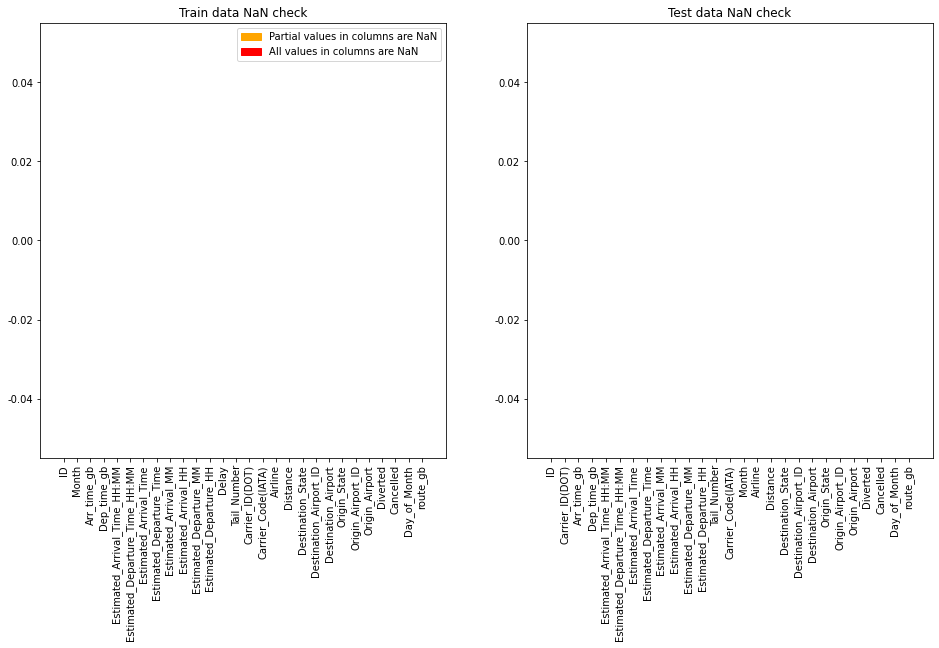

In [11]:
import matplotlib

matplotlib.rcParams['font.family'] = 'NanumBarunGothic'
matplotlib.rcParams['axes.unicode_minus'] = False

column = ['결손값 개수']
axis_1 = pd.DataFrame(data = train.isnull().sum(axis=1), columns = column)
axis_1 = axis_1.sort_values(by = '결손값 개수', ascending = False)

train.isnull().sum(axis=0)
train_row_NaN = pd.DataFrame(train.isnull().sum(axis=0), columns = column)
train_row_NaN = train_row_NaN.sort_values(by = '결손값 개수', ascending = False)
train_row_su = train.shape[0]
train_row_NaN['결손값_ratio'] = train_row_NaN['결손값 개수']/train_row_su

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.figure(figsize = (16,8))
x = np.arange(len(train_row_NaN.index))
plt.subplot(1, 2, 1)
plt.xticks(x, train_row_NaN.index)
plt.xticks(rotation=90)
plt.legend(handles=[mpatches.Patch(color='orange'),
                    mpatches.Patch(color='red')], 
           labels=['Partial values in columns are NaN', 'All values in columns are NaN'])

def color(data):
    if data == 1:
        return 'red'
    else:
        return 'orange'
plt.bar(x, train_row_NaN['결손값_ratio'], color = [color(i) for i in train_row_NaN['결손값_ratio']])
plt.title('Train data NaN check')

test.isnull().sum(axis=0)
test_row_NaN = pd.DataFrame(test.isnull().sum(axis=0), columns = column)
test_row_NaN = test_row_NaN.sort_values(by = '결손값 개수', ascending = False)
test_row_su = test.shape[0]
test_row_NaN['결손값_ratio'] = test_row_NaN['결손값 개수']/test_row_su

plt.subplot(1, 2, 2)
x2 = np.arange(len(test_row_NaN.index))
plt.xticks(x2, test_row_NaN.index)
plt.xticks(rotation=90)
plt.bar(x2, test_row_NaN['결손값_ratio'], color = [color(i) for i in test_row_NaN['결손값_ratio']])
plt.title('Test data NaN check')

print(test_row_NaN)
print(train_row_NaN)
plt.show()

In [12]:
map = {
    'Not_Delayed' :    1,
    'Delayed'     :    0, 
}
train['Delay'] = train.Delay.map(map)


In [13]:
# train 라벨링
qual_col = ['Origin_Airport', 'Origin_State', 'Destination_Airport', 'Destination_State', 'Airline', 'Carrier_ID(DOT)', 'Tail_Number', 'Estimated_Departure_Time_HH:MM','Estimated_Arrival_Time_HH:MM', 'Dep_time_gb',	'Arr_time_gb',	'route_gb']

for i in qual_col:
    le = LabelEncoder()
    le=le.fit(train[i])
    for label in np.unique(test[i].dropna()):
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    train[i] = le.transform(train[i])
    test[i] = le.transform(test[i])

In [14]:
X_train = train.drop(columns = ['ID','Delay'], axis=1)
y_train = train['Delay']
x_test = test


In [15]:
from supervised.automl import AutoML
automl = AutoML(
    mode = 'Compete',
    results_path = file_dir + 'automl2'
)

automl.fit(X_train, y_train)

Linear algorithm was disabled.
AutoML directory: C:\Users\qusru\openautoml2
The task is binary_classification with evaluation metric logloss
AutoML will use algorithms: ['Decision Tree', 'Random Forest', 'Extra Trees', 'LightGBM', 'Xgboost', 'CatBoost', 'Neural Network', 'Nearest Neighbors']
AutoML will stack models
AutoML will ensemble available models
AutoML steps: ['adjust_validation', 'simple_algorithms', 'default_algorithms', 'not_so_random', 'mix_encoding', 'golden_features', 'kmeans_features', 'insert_random_feature', 'features_selection', 'hill_climbing_1', 'hill_climbing_2', 'boost_on_errors', 'ensemble', 'stack', 'ensemble_stacked']
* Step adjust_validation will try to check up to 1 model
1_DecisionTree logloss 0.248929 trained in 6.04 seconds
Adjust validation. Remove: 1_DecisionTree
Validation strategy: 5-fold CV Shuffle,Stratify
* Step simple_algorithms will try to check up to 3 models
1_DecisionTree logloss 0.248993 trained in 107.09 seconds
2_DecisionTree logloss 0.24781

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >

2_DecisionTree_KMeansFeatures logloss 0.247819 trained in 196.09 seconds
* Step insert_random_feature will try to check up to 1 model
2_DecisionTree_GoldenFeatures_RandomFeature logloss 0.247786 trained in 151.31 seconds
Drop features ['Estimated_Departure_HH_diff_route_gb', 'route_gb_sum_Estimated_Arrival_HH', 'Estimated_Departure_HH', 'Origin_Airport_ID', 'Distance', 'Estimated_Departure_Time_HH:MM', 'Tail_Number', 'Carrier_Code(IATA)', 'Destination_Airport_ID', 'Destination_State', 'Destination_Airport', 'Origin_State', 'Estimated_Departure_Time', 'Origin_Airport', 'Origin_Airport_ID_ratio_Estimated_Departure_HH', 'Estimated_Departure_MM', 'random_feature', 'Estimated_Arrival_MM', 'Arr_time_gb_ratio_route_gb', 'Estimated_Arrival_Time', 'Estimated_Arrival_Time_HH:MM', 'Dep_time_gb', 'Arr_time_gb', 'route_gb', 'Estimated_Departure_Time_ratio_Origin_Airport_ID', 'Origin_Airport_ID_ratio_Estimated_Departure_Time', 'Arr_time_gb_ratio_Origin_Airport_ID', 'Day_of_Month']
Skip features_sele

AutoML(mode='Compete', results_path='C:\\Users\\qusru\\openautoml2')

In [16]:
y_pred = automl.predict_proba(x_test)


In [17]:
x_test['Not_Delayed'] =  y_pred[:,:1]
x_test['Delayed'] =  y_pred[:,1:]
x_test = x_test.reset_index()


In [18]:
sample_submission = sample_submission.reset_index()
sample_submission = sample_submission.drop(columns = ['Not_Delayed','Delayed'])

In [19]:
sample_submission = pd.merge(sample_submission, x_test[['ID', 'Not_Delayed','Delayed']], on = 'ID', how = 'inner')

In [20]:
sample_submission = sample_submission[['ID', 'Not_Delayed','Delayed']] 
sample_submission.set_index('ID')
sample_submission

,ID,Not_Delayed,Delayed
0,TEST_000000,0.174361,0.825639
1,TEST_000001,0.453129,0.546871
2,TEST_000002,0.186413,0.813587
3,TEST_000003,0.301948,0.698052
4,TEST_000004,0.079552,0.920448
...,...,...,...
999995,TEST_999995,0.051854,0.948146
999996,TEST_999996,0.022907,0.977093
999997,TEST_999997,0.052898,0.947102
999998,TEST_999998,0.050322,0.949678


In [21]:
sample_submission.to_csv(os.path.join(file_dir,'submit_automl.csv'), index=False,encoding="utf-8-sig")